In [2]:
import pandas as pd 
import numpy as np 
import random 
import matplotlib.pyplot as plt 
import matplotlib.cbook 
import zipfile 
import bz2 
import warnings 


In [3]:
data = pd.read_csv(r"K:\DATA SCIENCE\DataSets\TopMentor Datasets\data\Indicators.bz2")

In [4]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [5]:
print("data.shape: ", data.shape)

data.shape:  (5656458, 6)


In [6]:
print("Sample Data: \n",data.head())

Sample Data: 
   CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06  


In [7]:
print("Columns: \n",data.columns)

Columns: 
 Index(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year',
       'Value'],
      dtype='object')


In [9]:
#How many UNIQUE country names are there ? 
countries = data['CountryName'].unique().tolist() 
print("Number of countries: ",len(countries))

Number of countries:  247


In [10]:
#Are there same number of country codes ? 
#How many unique country codes are there? 
#It should be the same as number of unique countries. 
countryCodes = data['CountryCode'].unique().tolist() 
print("Number of country codes: ",len(countryCodes)) 

Number of country codes:  247


In [11]:
#Are there many indicators or few ? 
#How many unique indicators are there? 
indicators = data['IndicatorName'].unique().tolist() 
print("Number of indicators: ",len(indicators))

Number of indicators:  1344


In [12]:
#How many years of data do we have ? 
years = data['Year'].unique().tolist() 
print("Number of years: ",len(years)) 

Number of years:  56


In [13]:
#What's the range of years? 
print(min(years)," to ",max(years))

1960  to  2015


In [14]:
################# 
## Data Visualization 
################# 
#Let us pick a country and an indicator to explore CO2 Emissions per capita and the USA. 
#To select CO2 emissions for the United States, We will take the intersection 
# of two masks, one with all the rows that contains the string, 
# "C02 emissions" and the other which contains all the rows containing the string, "USA".

In [17]:

hist_indicator = 'CO2 emissions \(metric' 
hist_country = 'USA' 
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country) 
stage = data[mask1 & mask2] 
# stage dataset contain indicators matching the USA for country code & CO2 emissions over time. 
print (stage.shape) 
stage.head() 


(52, 6)


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


Indicator Name:  CO2 emissions (metric tons per capita)


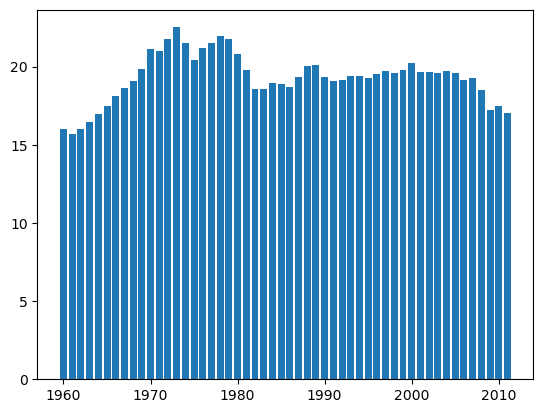

In [18]:
stage.head() 
print("Indicator Name: ", stage['IndicatorName'].iloc[0]) 
 
#Let us see how emissions have changed over time using MatplotLib 
years = stage['Year'].values # get the years 
co2 = stage['Value'].values # get the values 
# Plot the Histogram 
plt.bar(years,co2) 
plt.show() 

In [19]:
#It is seen that emissions per capita have dropped a bit over time, 
# but let us make this graph a bit more appealing before we continue to explore it. 

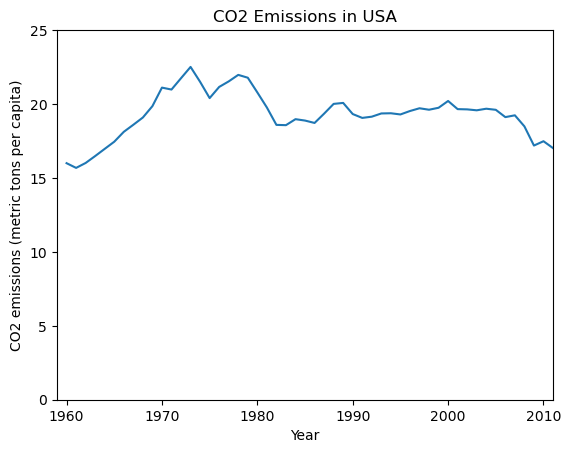

In [20]:
#Let us create a line plot. 
plt.plot(stage['Year'].values, stage['Value'].values) 
# Label the axes 
plt.xlabel('Year') 
plt.ylabel(stage['IndicatorName'].iloc[0]) 
# Label the figure 
plt.title('CO2 Emissions in USA') 
# Start the y axis at 0 and x axis from 1959 
plt.axis([1959, 2011,0,25]) 
plt.show() 

In [23]:
#Using Histograms to explore the distribution of values 
#We could also visualize this data as a histogram to better explore 
# the ranges of values in CO2 production per year. 
# If we want to just include those within one standard deviation fo the mean, you could do the following 
# lower = stage['Value'].mean() - stage['Value'].std() 
# upper = stage['Value'].mean() + stage['Value'].std() 
# hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper ] 
# Otherwise, let's look at all the data 
hist_data = stage['Value'].values 
print(hist_data) 
print(len(hist_data)) 


[15.99977916 15.68125552 16.0139375  16.48276215 16.96811858 17.45172525
 18.12107301 18.59831788 19.08938916 19.85794566 21.11125227 20.98020348
 21.74864198 22.51058213 21.50293038 20.40222407 21.15761537 21.53248401
 21.97300469 21.78043698 20.78648774 19.76676417 18.59049523 18.57154371
 18.97675027 18.88231274 18.72072272 19.35033442 20.01041341 20.07576978
 19.32336817 19.06223666 19.14555576 19.36346258 19.37655644 19.29565986
 19.52789051 19.71427574 19.6151546  19.74781478 20.20761476 19.65619321
 19.63919577 19.57623905 19.68358135 19.61027504 19.11613882 19.23746045
 18.48923375 17.1923791  17.48479218 17.02021634]
52


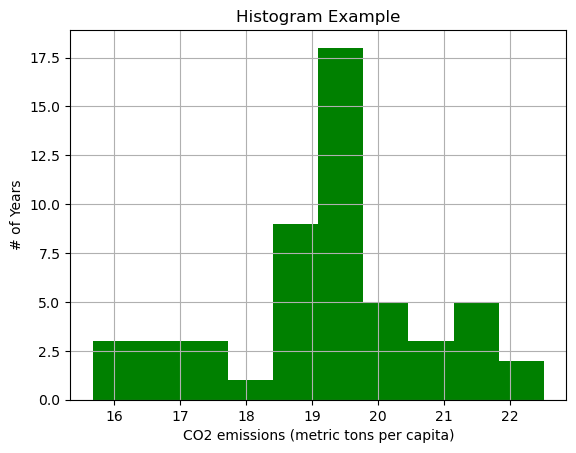

In [24]:
# Histogram of the data 
plt.hist(hist_data, 10, density=False, facecolor='green') # 10 is the number of bins 
plt.xlabel(stage['IndicatorName'].iloc[0]) 
plt.ylabel('# of Years') 
plt.title('Histogram Example') 
plt.grid(True) 
plt.show() 

In [25]:
#USA has many years where it produced between 19-20 metric tons per capita with outliers on either side. 
#But how do the USA's numbers relate to those of other countries? 
# select CO2 emissions for all countries in 2011 

In [28]:
hist_indicator = 'CO2 emissions \(metric' 
hist_year = 2011 
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year]) 
# apply our mask 
co2_2011 = data[mask1 & mask2] 
co2_2011.head() 


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [29]:
print(len(co2_2011)) 

232


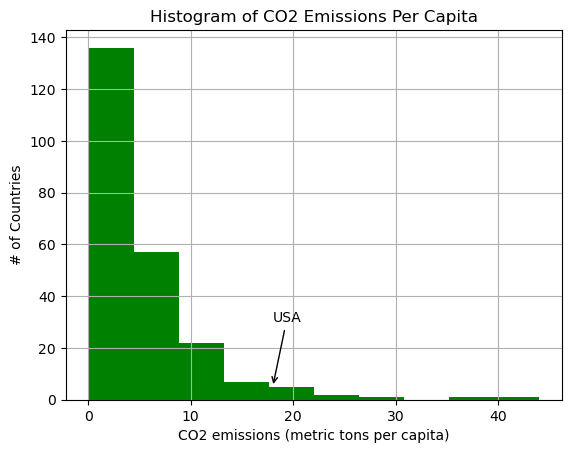

In [30]:
# Let us plot a histogram of the emmissions per capita by country 
# subplots returns a touple with the figure, axis attributes. 
fig, ax = plt.subplots() 
ax.annotate("USA",xy=(18, 5), xycoords='data',xytext=(18, 30), 
textcoords='data', 
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3")) 
plt.hist(co2_2011['Value'], 10, density=False, facecolor='green') 
plt.xlabel(stage['IndicatorName'].iloc[0]) 
plt.ylabel('# of Countries') 
plt.title('Histogram of CO2 Emissions Per Capita') 
plt.grid(True) 
plt.show()

In [31]:
#USA, at ~18 CO2 emissions (metric tons per capital) is quite high among all countries.

In [33]:
#Relationship between GPD and CO2 Emissions in USA 
# Select GDP Per capita emissions for the United States 
hist_indicator = 'GDP per capita \(constant 2005' 
hist_country = 'USA' 
mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country) 
# Stage is just those indicators matching the USA for country code and CO2 emissions over time. 
gdp_stage = data[mask1 & mask2] 
# Plot gdp_stage vs stage 
print("GDP: ",gdp_stage.head()) 

GDP:            CountryName CountryCode                       IndicatorName  \
22282   United States         USA  GDP per capita (constant 2005 US$)   
48759   United States         USA  GDP per capita (constant 2005 US$)   
77142   United States         USA  GDP per capita (constant 2005 US$)   
105760  United States         USA  GDP per capita (constant 2005 US$)   
134798  United States         USA  GDP per capita (constant 2005 US$)   

         IndicatorCode  Year         Value  
22282   NY.GDP.PCAP.KD  1960  15482.707760  
48759   NY.GDP.PCAP.KD  1961  15578.409657  
77142   NY.GDP.PCAP.KD  1962  16276.426685  
105760  NY.GDP.PCAP.KD  1963  16749.789436  
134798  NY.GDP.PCAP.KD  1964  17476.822248  


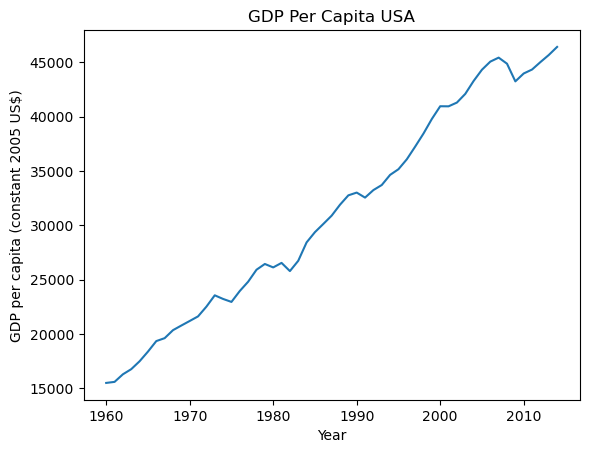

In [35]:
# Switch to a line plot 
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values) 
# Label the axes 
plt.xlabel('Year') 
plt.ylabel(gdp_stage['IndicatorName'].iloc[0]) 
#Label the figure 
plt.title('GDP Per Capita USA') 
plt.show()

In [36]:
#Although we have seen a decline in the CO2 emissions per capita, 
# it does not seem to translate to a decline in GDP per capita 

In [37]:
#ScatterPlot for comparing GDP against CO2 emissions (per capita) 
#First, we will need to make sure we are looking at the same time frames. 
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", 
gdp_stage['Year'].max()) 
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max()) 

GDP Min Year =  1960 max:  2014
CO2 Min Year =  1960 max:  2011


In [39]:
#We have 3 extra years of GDP data, so let's trim those off so the scatterplot 
# has equal length arrays to compare (this is actually required by scatterplot) 
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012] 
print(len(gdp_stage_trunc)) 
print(len(stage))

52
52


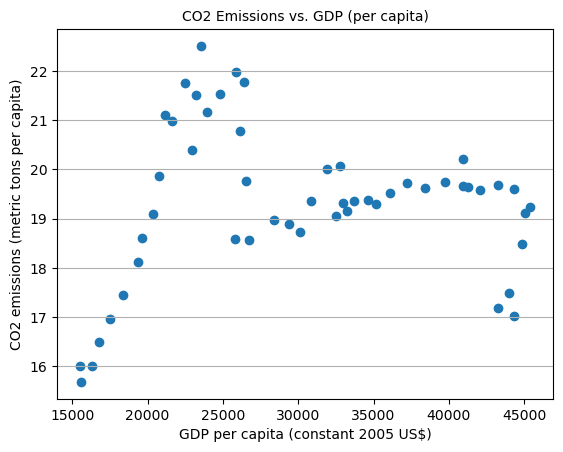

In [40]:
 
import matplotlib.pyplot as plt 
fig, axis = plt.subplots() 
# Grid lines, Xticks, Xlabel, Ylabel 
axis.yaxis.grid(True) 
axis.set_title('CO2 Emissions vs. GDP (per capita)',fontsize=10) 
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0],fontsize=10) 
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10) 
X = gdp_stage_trunc['Value'] 
Y = stage['Value'] 
axis.scatter(X, Y) 
plt.show() 

In [41]:
#This does not look like a strong relationship. We can test this by looking at correlation. 
print(np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])) 

[[1.         0.07676005]
 [0.07676005 1.        ]]


In [42]:
 #A correlation of 0.07 is very weak.